# Rook: Diff Workflow with Prov

* https://prov.readthedocs.io/en/latest/index.html
* https://nbviewer.org/github/cehbrecht/provenance-demo/blob/main/notebooks/roocs-demo.ipynb

In [1]:
from prov.model import ProvDocument

In [2]:
# Create a new provenance document
doc = ProvDocument()

In [3]:
# Declaring namespaces for various prefixes used in the example
ROOCS_URI_PREFIX = 'https://roocs.org/'
doc.add_namespace('workflow', ROOCS_URI_PREFIX + 'workflow')  # workflow description
doc.add_namespace('operator', ROOCS_URI_PREFIX + 'operator')  # task, job, calculation, algorithm
doc.add_namespace('parameter', ROOCS_URI_PREFIX + 'parameter') # operator parameter, option
doc.add_namespace('file', ROOCS_URI_PREFIX + 'file')  # netcdf, plots


<Namespace: file {https://roocs.org/file}>

In [4]:
# Input Datasets
ds_mpi = doc.entity('file:mpi_tas_2000-2010.nc')
ds_ipsl = doc.entity('file:ipsl_tas_2000-2010.nc')

In [5]:
# Create workflow
wf_diff = doc.entity('workflow:diff')

In [6]:
# Run subset 1
op_subset1 = doc.activity('operator:subset1', 
                         other_attributes={'parameter:time': '2005'})

doc.start(op_subset1, trigger=wf_diff)

# Generated output file for mpi dataet
output1 = doc.entity('file:mpi_tas_2005.nc')
doc.wasDerivedFrom(output1, ds_mpi, activity=op_subset1)

<ProvDerivation: (file:mpi_tas_2005.nc, file:mpi_tas_2000-2010.nc)>

In [7]:
# Run subset 2
op_subset2 = doc.activity('operator:subset2', 
                         other_attributes={'parameter:time': '2005'})

doc.start(op_subset2, trigger=wf_diff)

# Generated output file for ipsl dataset
output2 = doc.entity('file:ipsl_tas_2005.nc')
doc.wasDerivedFrom(output2, ds_ipsl, activity=op_subset2)

<ProvDerivation: (file:ipsl_tas_2005.nc, file:ipsl_tas_2000-2010.nc)>

In [8]:
# Run diff on subset outputs
op_diff = doc.activity('operator:diff')

doc.start(op_diff, trigger=wf_diff)

# Generated output
output_diff = doc.entity('file:diff_tas_2005.nc')
doc.wasDerivedFrom(output_diff, output1, activity=op_diff)
doc.wasDerivedFrom(output_diff, output2, activity=op_diff)

<ProvDerivation: (file:diff_tas_2005.nc, file:ipsl_tas_2005.nc)>

## Show Provenance

In [9]:
print(doc.get_provn())

document
  prefix workflow <https://roocs.org/workflow>
  prefix operator <https://roocs.org/operator>
  prefix parameter <https://roocs.org/parameter>
  prefix file <https://roocs.org/file>
  
  entity(file:mpi_tas_2000-2010.nc)
  entity(file:ipsl_tas_2000-2010.nc)
  entity(workflow:diff)
  activity(operator:subset1, -, -, [parameter:time="2005"])
  wasStartedBy(operator:subset1, workflow:diff, -, -)
  entity(file:mpi_tas_2005.nc)
  wasDerivedFrom(file:mpi_tas_2005.nc, file:mpi_tas_2000-2010.nc, operator:subset1, -, -)
  activity(operator:subset2, -, -, [parameter:time="2005"])
  wasStartedBy(operator:subset2, workflow:diff, -, -)
  entity(file:ipsl_tas_2005.nc)
  wasDerivedFrom(file:ipsl_tas_2005.nc, file:ipsl_tas_2000-2010.nc, operator:subset2, -, -)
  activity(operator:diff, -, -)
  wasStartedBy(operator:diff, workflow:diff, -, -)
  entity(file:diff_tas_2005.nc)
  wasDerivedFrom(file:diff_tas_2005.nc, file:mpi_tas_2005.nc, operator:diff, -, -)
  wasDerivedFrom(file:diff_tas_2005.nc

## Plot Provenance

In [10]:
from prov.dot import prov_to_dot
figure = prov_to_dot(doc)
figure.write_png("wf_diff_prov.png")

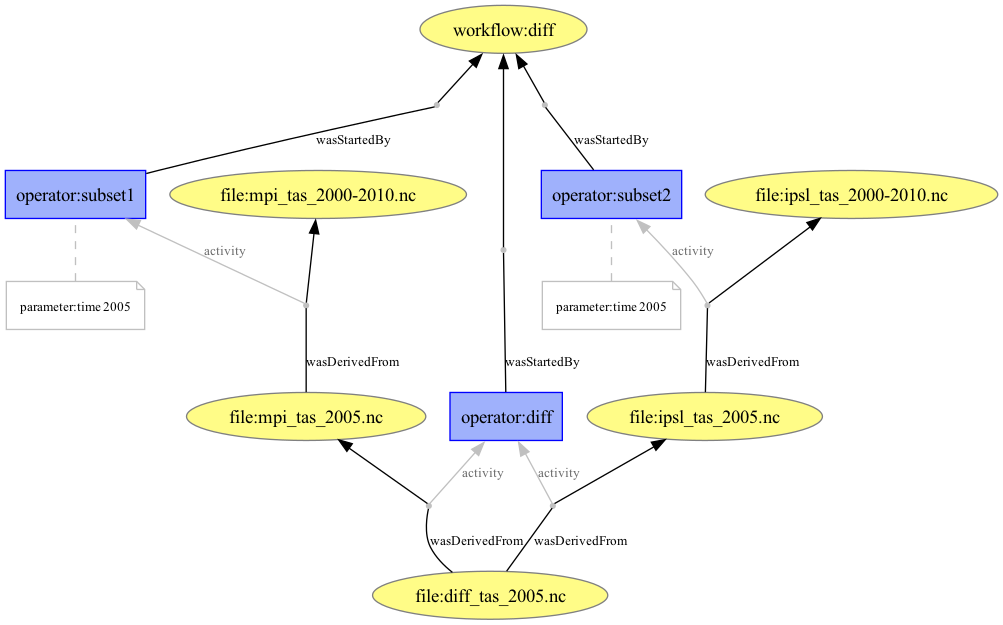

In [11]:
from IPython.display import Image
Image("wf_diff_prov.png")